<a href="https://colab.research.google.com/github/erikawkr/Python/blob/main/PYTN_Assgn_2_4_Erika_Taniya_Devi_Winckler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import math
import numpy as np
import scipy.stats
import statistics
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [2]:
# Membaca data NYC Rolling Sales 
df = pd.read_csv('nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,...,5.0,0.0,5.0,1633,6440,1900.0,2.0,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,...,28.0,3.0,31.0,4616,18690,1900.0,2.0,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,...,16.0,1.0,17.0,2212,7803,1900.0,2.0,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402.0,21.0,,C4,154 EAST 7TH STREET,...,10.0,0.0,10.0,2272,6794,1913.0,2.0,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404.0,55.0,,C2,301 EAST 10TH STREET,...,6.0,0.0,6.0,2369,4615,1900.0,2.0,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58480,9082,4,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,5066.0,1932.0,,R4,131-05 40TH ROAD,...,1.0,0.0,1.0,-,-,2015.0,2.0,R4,575044,2017-03-21 00:00:00
58481,9083,4,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,5066.0,2014.0,,R4,131-03 40TH ROAD,...,1.0,0.0,1.0,-,-,2016.0,2.0,R4,802623,2017-07-21 00:00:00
58482,9084,4,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,5066.0,2015.0,,R4,131-03 40TH ROAD,...,1.0,0.0,1.0,-,-,2016.0,2.0,R4,665159,2017-06-07 00:00:00
58483,9085,4,FLUSHING-NORTH,13 CONDOS - ELEVATOR APARTMENTS,2,5066.0,2016.0,,R4,131-03 40TH ROAD,...,1.0,0.0,1.0,-,-,2016.0,2.0,R4,708435,2017-05-01 00:00:00


In [3]:
# Melihat kolom data 
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [4]:
# Melihat nilai unik pada data NYC Rolling Sales 
for i in df.columns:
    print("\n", i)
    print(df[i].unique())


 Unnamed: 0
[    4     5     6 ... 24048 24049 24050]

 BOROUGH
[1 2 3 4]

 NEIGHBORHOOD
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON' 

In [5]:
# Membuat variable missing values
miss_val = ['na','--','NaN','NA','n/a','?',' ','n-a',' -  ']
df = pd.read_csv('nyc-rolling-sales.csv', na_values=miss_val)

Pemrosesan Data

In [6]:
#Menghapus kolom unnamed:0 dan EASE-MENT
df.drop(["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER"], axis=1, inplace=True)

In [7]:
#Mengubah data sale date ke date time
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [8]:
#Mengubah tipe data menjadi data numeric
num = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in num: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
#Mengubah tipe data menjadi categorical
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 
               'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [10]:
#cek tipe data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   ZIP CODE                        84548 non-null  category      
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

In [11]:
#cek missing values 
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [12]:
#cek data duplikat 
df.duplicated().sum()

765

In [14]:
# hapus data duplikat
df.drop_duplicates(inplace = True)

In [15]:
#Melihat skewness dari setiap kolom
df.skew(axis=0, skipna=True)

<ipython-input-15-cffe3e401407>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis=0, skipna=True)


BLOCK                  1.046322
LOT                    3.506785
RESIDENTIAL UNITS     62.058053
COMMERCIAL UNITS     224.990028
TOTAL UNITS           65.249327
LAND SQUARE FEET      75.762320
GROSS SQUARE FEET     61.121216
SALE PRICE           123.943132
dtype: float64

In [16]:
#handling missing values 
#Tipe data kategorial 
rep_mode = ['TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT']
for col1 in rep_mode:
    df[col1].fillna(df[col1].mode(), inplace=True)

#Tipe data numeric
df["LAND SQUARE FEET"]=df["LAND SQUARE FEET"].fillna(df["LAND SQUARE FEET"].median())
df["GROSS SQUARE FEET"]=df["GROSS SQUARE FEET"].fillna(df["GROSS SQUARE FEET"].median())
df["SALE PRICE"]=df["SALE PRICE"].fillna(df["SALE PRICE"].median())

In [17]:
df.isna().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              738
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         738
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

In [18]:
#Menghapus data duplikat pada kolom YEAR BUILT
years = df["YEAR BUILT"].drop_duplicates()
years

0        1900
3        1913
6        1920
10       1910
11       2009
         ... 
33557    1871
39533    1893
44615    1865
45042    1882
81875    1680
Name: YEAR BUILT, Length: 158, dtype: category
Categories (158, int64): [0, 1111, 1680, 1800, ..., 2014, 2015, 2016, 2017]

In [19]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,8.378300e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.375438e+03,3.170620e+03,1.154192e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,3.449485e+04,2.860114e+04,1.042234e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,3.000000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,2.650000e+03,2.080000e+03,8.350000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


In [20]:
#Menghitung nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Nilai 0 pada YEAR BUILT:  6885
Nilai 0 pada TOTAL UNIT:  19677
Nilai 0 pada SALE PRICE:  10012


In [21]:
#Menghapus nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE
df['YEAR BUILT'].replace(0, np.nan, inplace=True)
df['TOTAL UNITS'].replace(0, np.nan, inplace=True)
df['SALE PRICE'].replace(0, np.nan, inplace=True)

In [22]:
#Pengecekan nilai 0 pada kolom YEAR BUILT, TOTAL UNIT, SALE PRICE 
print("Nilai 0 pada YEAR BUILT: ",df[df['YEAR BUILT']==0]['YEAR BUILT'].count())
print("Nilai 0 pada TOTAL UNIT: ",df[df['TOTAL UNITS']==0]['TOTAL UNITS'].count())
print("Nilai 0 pada SALE PRICE: ",df[df['SALE PRICE']==0]['SALE PRICE'].count())

Nilai 0 pada YEAR BUILT:  0
Nilai 0 pada TOTAL UNIT:  0
Nilai 0 pada SALE PRICE:  0


In [23]:
#Menghapus missing values
df.dropna(inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51546 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         51546 non-null  category      
 1   NEIGHBORHOOD                    51546 non-null  category      
 2   BUILDING CLASS CATEGORY         51546 non-null  category      
 3   TAX CLASS AT PRESENT            51546 non-null  category      
 4   BLOCK                           51546 non-null  int64         
 5   LOT                             51546 non-null  int64         
 6   BUILDING CLASS AT PRESENT       51546 non-null  category      
 7   ADDRESS                         51546 non-null  object        
 8   ZIP CODE                        51546 non-null  category      
 9   RESIDENTIAL UNITS               51546 non-null  int64         
 10  COMMERCIAL UNITS                51546 non-null  int64         
 11  TO

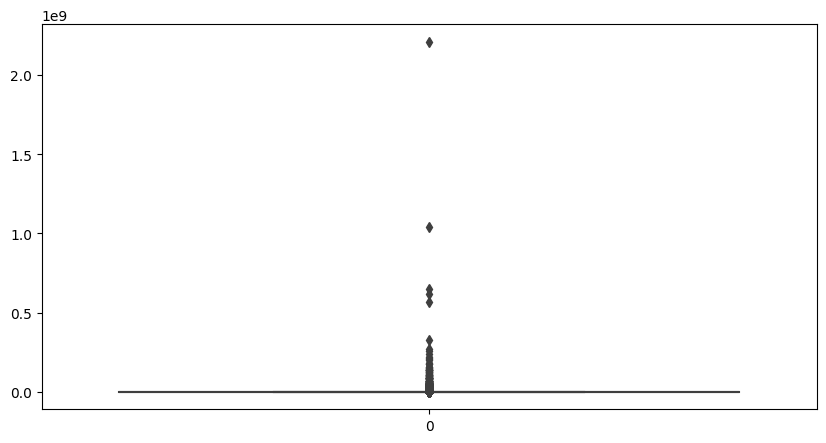

In [25]:
#Membuat boxplot untuk melihat outliers pada SALE PRICE
plt.figure(figsize=(10,5))
sns.boxplot(df["SALE PRICE"])
plt.show()

In [26]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 800000)]

In [28]:
#Melakukan encode pada kolom BOROUGH
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31.0,4616.0,18690.0,1900,2,C7,533000.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17.0,2212.0,7803.0,1900,2,C7,533000.0,2016-12-09
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20.0,2581.0,9730.0,1900,2,C4,533000.0,2017-07-20
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46.0,5163.0,21007.0,1900,2,C7,533000.0,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15.0,1534.0,9198.0,1920,2,D5,533000.0,2017-06-20


Measure Of Central Tendency

Mean

In [29]:
#Menghitung nilai mean SALE PRICE pada setiap data di kolom BOROUGH
mean_saleprice = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True)
mean_saleprice

,SALE PRICE
BOROUGH,
Bronx,454719.496226
Staten Island,479749.732431
Queens,518863.461569
Brooklyn,531021.716746
Manhattan,551868.071038


- Berdasarkan dari tabel diatas, nilai rata-rata tertinggi terdapat di kota Manhattan sebesar 551868.071038. 

In [31]:
#Menghitung nilai mean pada setiap data di kolom BOROUGH
mean_all= df.groupby('BOROUGH').mean()
mean_all

<ipython-input-31-719b1bfea520>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_all= df.groupby('BOROUGH').mean()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,1162.025715,1046.780135,5.309225,0.945034,6.371906,2941.598843,8586.459981,551868.071038
Bronx,4229.494257,118.194289,2.068592,0.046275,2.114539,2620.252379,2278.153922,454719.496226
Brooklyn,5154.577713,371.171405,1.754513,0.058726,1.822992,1981.770284,1704.962440,531021.716746
Queens,7722.878476,229.919006,2.207634,0.225866,2.466881,3921.786136,2888.354014,518863.461569
Staten Island,3261.245902,215.497933,1.288952,0.058731,1.350677,4296.569779,1872.173913,479749.732431


Berdasarkan dari tabel diatas, maka dapat ditarik kesimpulan

- Manhattan memiliki nilai rata-rata tertinggi pada LOT, Resedential Units, Totak Unit, dan Gross Square Feet. 
- Kota Queens memiliki nilai rata-rata tertinggi pada kolom Block. 
- Kota State Island memiliki nilai rata-rata tertinggi pada Land Square Feet. 

Median

In [35]:
#Menghitung nilai median SALE PRICE pada setiap data di kolom BOROUGH
median_sale_price = df[['BOROUGH','SALE PRICE']].groupby('BOROUGH').median().sort_values(by='SALE PRICE', ascending=True)
median_sale_price

,SALE PRICE
BOROUGH,
Bronx,450000.0
Manhattan,533000.0
Queens,533000.0
Staten Island,533000.0
Brooklyn,550000.0


- Berdasarkan tabel diatas, maka dapat ditarik kesimpulan bahwa median tertinggi terdapat pada kota Brooklyn yaitu sebesar 550000.0 dan median terendah berada di kota Bronx sebesar 450000.0.

Modus

In [34]:
#Menghitung nilai modus TOTAL UNIT pada setiap data di kolom BOROUGH
modus_sale_price = df[['BOROUGH','TOTAL UNITS']].groupby(['BOROUGH']).apply(pd.DataFrame.mode).reset_index(drop=True)
modus_sale_price

,BOROUGH,TOTAL UNITS
0,Manhattan,1.0
1,Bronx,2.0
2,Brooklyn,1.0
3,Queens,1.0
4,Staten Island,1.0


- Berdasarkan tabel diatas, maka dapat ditarik kesimpulan bahwa kota  Bronx memiliki nilai total unit sebesar 2, Sedangkan kota lainnnya memiliki total unit 1.

Measure of Spread

Variance

In [36]:
#Menghitung nilai variance pada setiap data di kolom BOROUGH
var_all = df.groupby('BOROUGH').var()
var_all

<ipython-input-36-36afa5f15524>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var_all = df.groupby('BOROUGH').var()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,3.142175e+05,717910.228171,1350.462548,168.305338,1529.207301,5.069350e+07,3.318655e+09,6.686725e+09
Bronx,8.998643e+05,70474.574189,73.524841,0.072382,73.509857,8.828127e+06,5.613665e+07,2.292858e+10
Brooklyn,6.275066e+06,291303.238775,42.074012,0.124197,42.154008,2.533582e+08,7.328386e+07,2.853781e+10
Queens,1.970488e+07,227306.659603,550.275505,335.528177,895.808833,2.417852e+09,1.953598e+09,1.558957e+10
Staten Island,5.119743e+06,204110.845412,3.765226,2.375221,6.028134,7.767154e+08,7.213998e+07,1.781652e+10


Range

In [37]:
#Menghitung nilai range SALE PRICE pada setiap data di kolom BOROUGH
range_sale_price = df.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range_sale_price

BOROUGH
Manhattan        691680.0
Bronx            697500.0
Brooklyn         698326.0
Queens           698634.0
Staten Island    698300.0
dtype: float64

- Dari tabel diatas, maka dapat disimpulkan bahwa tidak terdapat perbedaan yang signifikan pada setiap kota yaitu berkisar di angka 690000. 

Standard Deviasi

In [38]:
#Menghitung nilai standar deviasi pada setiap data di kolom BOROUGH
std_all = df.groupby('BOROUGH').std()
std_all

<ipython-input-38-e758b3bce9a8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_all = df.groupby('BOROUGH').std()


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Manhattan,560.551027,847.295833,36.748640,12.973255,39.105080,7119.937134,57607.771999,81772.396199
Bronx,948.611759,265.470477,8.574663,0.269039,8.573789,2971.216482,7492.439587,151421.869236
Brooklyn,2505.008121,539.725151,6.486448,0.352416,6.492612,15917.228446,8560.599356,168931.371636
Queens,4439.017348,476.766882,23.457952,18.317428,29.930066,49171.654954,44199.529479,124858.189065
Staten Island,2262.684895,451.786283,1.940419,1.541175,2.455226,27869.614505,8493.525502,133478.522279


Probability Distribution

<ipython-input-40-e11f823402cd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Brooklyn')]

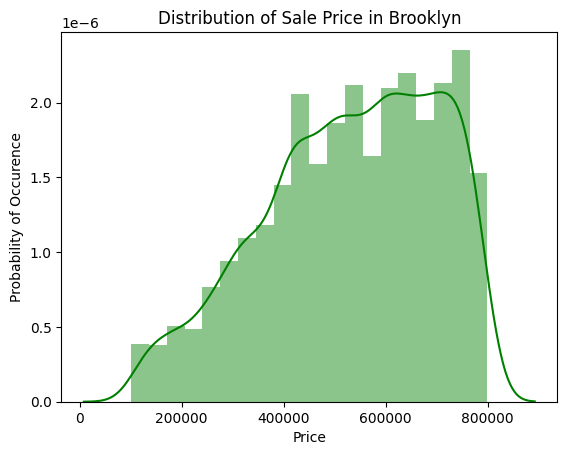

In [40]:
#Membuat probability distribution Brooklyn di kolom SALE PRICE 
df_1 = df.groupby("BOROUGH")
br = df_1.get_group('Brooklyn')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Brooklyn')

- Hasil grafik diatas terlihat bahwa sale price kota Brooklyn lebih dominan ke kiri. Hal ini berarti bahwa nilai observasi berfrekuensi rendah lebih banyak di sebelah kiri dari rata-rata. 

<ipython-input-41-9669118b2f51>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(br['SALE PRICE'],


[Text(0.5, 0, 'Price'),
 Text(0, 0.5, 'Probability of Occurence'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Bronx')]

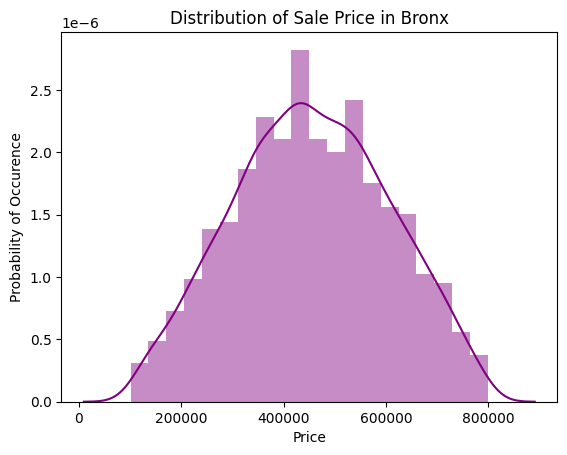

In [41]:
#Membuat probability distribution Bronx di kolom SALE PRICE 
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')

ax = sns.distplot(br['SALE PRICE'],
                  kde=True,
                  bins=20,
                  color='purple',
                  hist_kws={"linewidth": 15,'alpha':0.45})

ax.set(xlabel='Price', 
       ylabel='Probability of Occurence', 
       title='Distribution of Sale Price in Bronx')

Confidence Interval

In [42]:
#Menampilkan mean, standard deviation, dan population size dari SALE PRICE
CI=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
CI

SALE PRICE                      
                        mean            std   size
BOROUGH                                           
Manhattan      551868.071038   81772.396199   3111
Bronx          454719.496226  151421.869236   3047
Brooklyn       531021.716746  168931.371636   4819
Queens         518863.461569  124858.189065  15248
Staten Island  479749.732431  133478.522279   7015

In [43]:
#Mengekstrak parameter yang diperlukan
mean_sp = CI.iloc[0,0]
sd = CI.iloc [0,1]
n = CI.iloc [0,2]         
z = 1.96    

In [44]:
#Menghitung standard error menggunakan formula untuk standard error dari mean
se = sd / np.sqrt(n)

In [45]:
#Membangun CI
lcb = mean_sp - z * se
ucb = mean_sp + z * se
lcb, ucb

(548994.5605278267, 554741.5815486761)

Hypothesis Testing

In [46]:
#Shapiro-Wilk Test
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
mh = df1.get_group('Manhattan')
sp = mh['SALE PRICE']

from scipy.stats import shapiro
stat, p = shapiro(sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.629, p=0.000
Probably not Gaussian


In [48]:
#DAgostino,s K^2 Test
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
br = df1.get_group('Bronx')
sp1 = br['SALE PRICE']

from scipy.stats import normaltest
stat, p = normaltest(sp1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=124.810, p=0.000
Probably not Gaussian


In [47]:
#Anderson-Darling Test
from scipy.stats import pearsonr
df1 = df.groupby("BOROUGH")
brok = df1.get_group('Brooklyn')
sp2 = brok['SALE PRICE']

from scipy.stats import anderson
results = anderson(sp2)
print('stat=%.3f' % (results.statistic))
for i in range(len(results.critical_values)):
      sl, cv = results.significance_level[i], results.critical_values[i]
      if results.statistic < cv:
          print('Probably Gaussian at the %.1f%% level' % (sl))
      else:
          print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=39.849
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


## Kesimpulan:
1. Nilai mean tertinggi terdapat pada kota Manhattan sebesar 551868.071038.
2. Nilai median tertinggi terdapat pada kota Brooklyn yaitu sebesar 550000 dan median terendah berada di kota Bronx sebesar 450000.0.
3. Kota Manhattan dan Bronx memiliki paling tidak total 1 unit, sedangkan kota lainnya memiliki 1 total unit. 
4. Range sale price pada setiap kota memiliki nilai yang tidak jauh significant yaitu berkisar pada angka 690000. 
5. Sebagian besar kota memiliki nilai varians yang tinggi, berarti data memiliki distribusi yang besar.
6. Berdasarkan pengujian hipotesis, didapatkan p-value < 0.05 sehingga sampel tidak berdistribusi Gaussian atau H0 ditolak. 